# Let's take a look at characteristics of various wines

First, let's find some cool data --> http://www3.dsi.uminho.pt/pcortez/wine/

Hit that link - and download the zip. Then, let's get started.

In [1]:
!python3 -m pip install -U matplotlib

In [2]:
## import packages and alias correctly (pandas, matplotlib (inline!), seaborn)

import pandas as pd 

# matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read in each wine data set as a separate pandas dataframe

red = pd.read_csv('winequality-red.csv', index_col=0)
white = pd.read_csv('winequality-white.csv', index_col=0)

In [4]:
#take a look at the first few rows of the red wine data frame

red.head()

""
"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5
11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


Ok - that's really ugly. Lets think about what happened. We imported from a csv, but it seems that the values
are delimited with ";" insteasd of just commas. Pandas doesn't like this, so let's try using the sep='' kwarg to solve this.

In [5]:
red = pd.read_csv('winequality-red.csv', index_col=0, sep=';')
white = pd.read_csv('winequality-white.csv', index_col=0, sep=';')

In [6]:
#take a look at the first few rows of the red dataframe again

red.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,,,,,,,,,,,
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
#do the same for the white

white.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,,,,,,,,,,,
7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Awesome - now we're on the right track. Now, let's explore these datasets just a little bit. 

Check the DataFrame's dtype and column dtypes, and non-null value counts. Feel free search online, there's one method that will give you all of this at once!

In [8]:
#display dtype and column dtypes, and non-null value counts

red.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1599 entries, 7.4 to 6.0
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   volatile acidity      1599 non-null   float64
 1   citric acid           1599 non-null   float64
 2   residual sugar        1599 non-null   float64
 3   chlorides             1599 non-null   float64
 4   free sulfur dioxide   1599 non-null   float64
 5   total sulfur dioxide  1599 non-null   float64
 6   density               1599 non-null   float64
 7   pH                    1599 non-null   float64
 8   sulphates             1599 non-null   float64
 9   alcohol               1599 non-null   float64
 10  quality               1599 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 149.9 KB


So - what's the first obvious thing about this data set? It's too good to be true! There are no missing values. Later in the class we'll discuss how to handle bad or missing data.

Let's do some very basic exploration. It seems like this dataset basically contains a bunch of characteristics of various wines, as well as some sort of "quality" rating.

## Now let's find a few summary stats:

Because we're just starting out, I'll give you a hint here. The .corr() and .describe() methods can be used to answer all of the below questions.

- What's the average residual sugars in red wines? 2.538806

- How much alchohol does the 50% percentile white wine have? 10.400000	

- What feature seems to be most positively correlated with quality for red wine? Alcohol
 
- Is is the same for white? Yes - alcohol takes the cake.
    
- What feature seems to be most negatively correlated with quality for red wine? Volatile acidity

- Is is the same for white? No - for white wine, it's Density. Interesting.

In [9]:
#find average sugars in the reds

red['residual sugar'].describe()

count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

In [10]:
#find alcohol content for white wines in the 50th percentile

white['alcohol'].describe()

count    4898.000000
mean       10.514267
std         1.230621
min         8.000000
25%         9.500000
50%        10.400000
75%        11.400000
max        14.200000
Name: alcohol, dtype: float64

In [11]:
#find the feature most correlated with quality for red wine

red.corr()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
volatile acidity,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397
alcohol,-0.202288,0.109903,0.042075,-0.221141,-0.069408,-0.205654,-0.496180,0.205633,0.093595,1.000000,0.476166


In [12]:
#find the feature most correlated with quality for white wine

white.corr()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
volatile acidity,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678
alcohol,0.067718,-0.075729,-0.450631,-0.360189,-0.250104,-0.448892,-0.780138,0.121432,-0.017433,1.000000,0.435575


In [13]:
#find the feature most negatively correlated with quality for red wine

red.corr().sort_values('quality')

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
volatile acidity,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
total sulfur dioxide,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
chlorides,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
pH,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
free sulfur dioxide,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
residual sugar,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
citric acid,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
sulphates,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397
alcohol,-0.202288,0.109903,0.042075,-0.221141,-0.069408,-0.205654,-0.496180,0.205633,0.093595,1.000000,0.476166


In [14]:
#find the feature most negatively correlated with quality for white wine

white.corr().sort_values('quality')

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
density,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
chlorides,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
volatile acidity,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
total sulfur dioxide,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
residual sugar,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
citric acid,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
free sulfur dioxide,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
sulphates,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678
pH,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
alcohol,0.067718,-0.075729,-0.450631,-0.360189,-0.250104,-0.448892,-0.780138,0.121432,-0.017433,1.000000,0.435575


## Ok, let's move on to some harder stuff

It's kind of annoying to continue dealing with two separate data frames, so, let's combine them. . .

But wait. . .

How are we going to tell the difference between red data points white data points?

We'll need to add a column to keep the colors straight. Let's do that now.

In [15]:
#add a 'color' column to the red dataframe and set it's value to 'red' for every row
red['color'] = "red"

In [16]:
#display the first few rows of the red dataframe and confirm your new column is there as expected

red.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
fixed acidity,,,,,,,,,,,,
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


See? That was super easy. Now why don't you do the same for the white wine data.

In [17]:
#repeat the above process for the white dataframe

white['color'] = "white"

Ok, let's take a look at each DataFrame one last time, just to confirm we haven't messed anything up.

In [18]:
#display the first few rows of the white dataframe

white.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
fixed acidity,,,,,,,,,,,,
7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [19]:
#display the first few rows of the red dataframe

red.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
fixed acidity,,,,,,,,,,,,
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Looks like we got lucky here. . .

The column names match exactly, so let's merge these two DataFrames. This is super easy to do. . . just need the right function.

In [20]:
#concatenate the dataframe together

frames = [red, white]
red_and_white = pd.concat(frames)

In [21]:
#display the first few rows of the new combined dataframe

red_and_white.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
fixed acidity,,,,,,,,,,,,
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [22]:
#let's just double check that we didn't lose any data. A quick len() check will do.

len(red) + len(white) - len(red_and_white)

0

Now - although we'll get way deeper on visualization later. Let's dip our toes in now, just to feel what this data looks like.

A quick set of pairplots, is a great way of visualizing relationships.

KeyboardInterrupt: 

<Figure size 800x640 with 0 Axes>

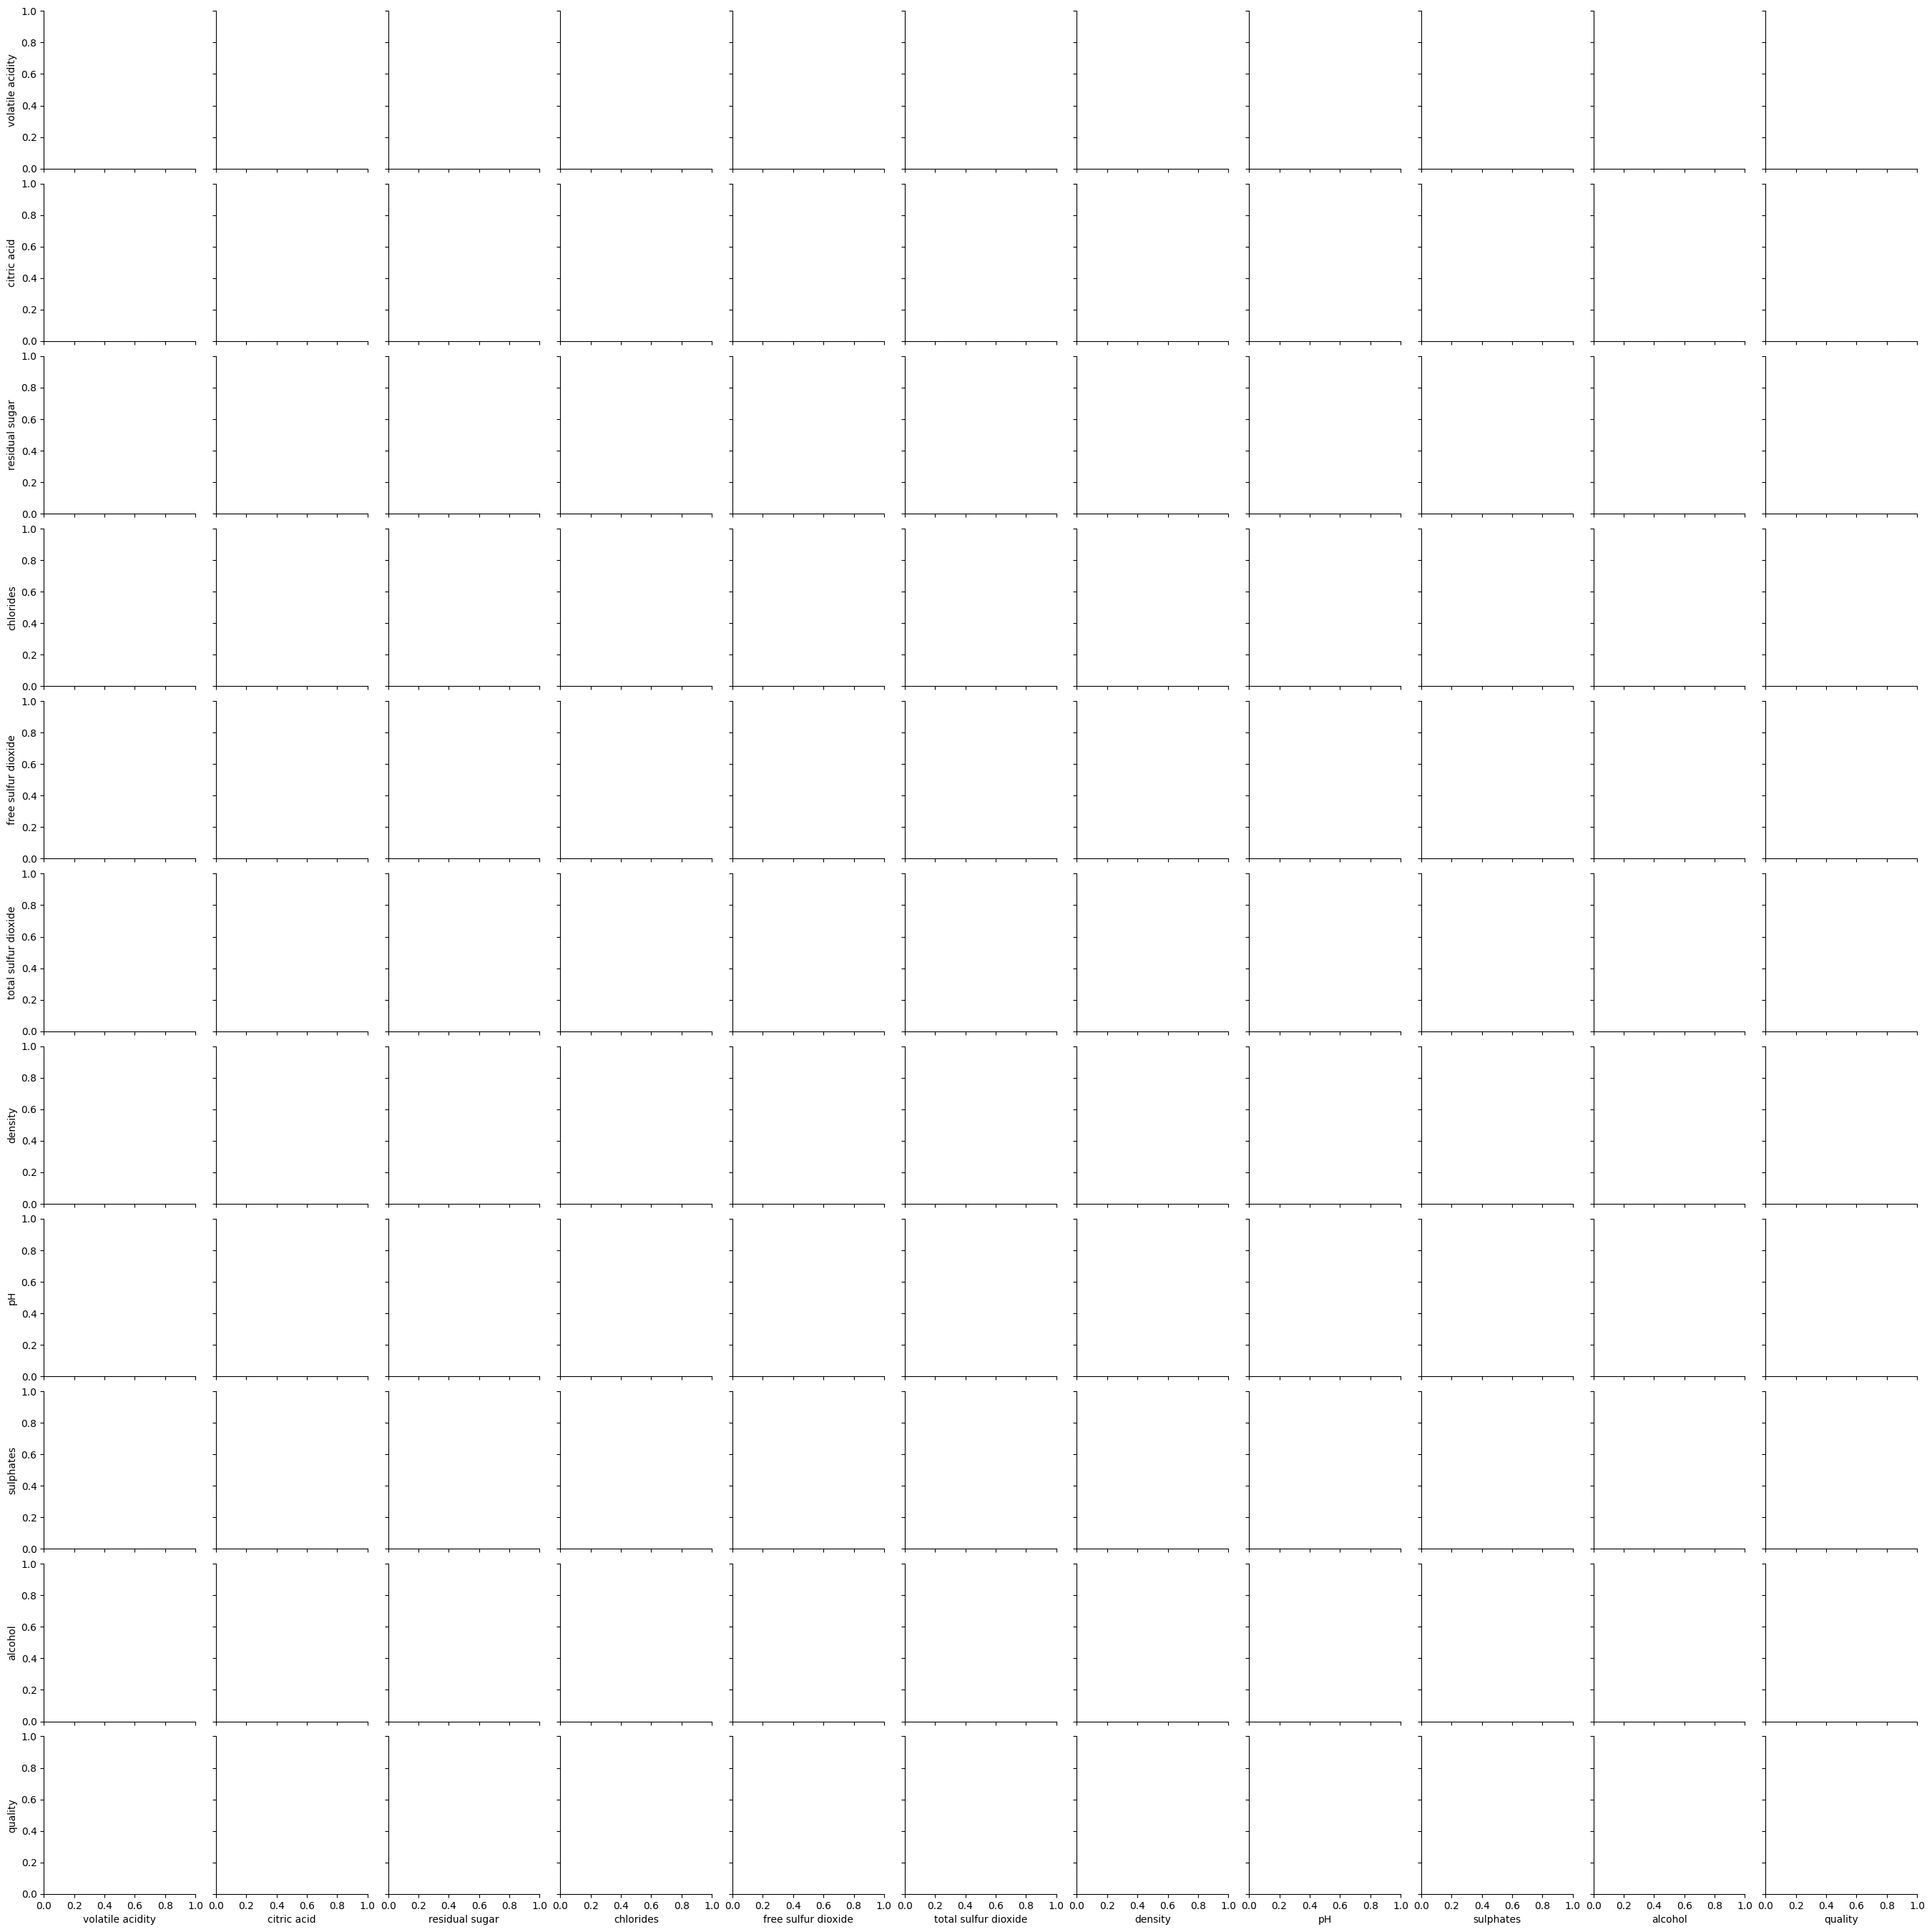

In [23]:
#use pyplot from matplotlib to create a grid of pairplots of every variable.

plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(red_and_white, hue="color")
plt.show()

Ok - before we finish here, let's save this data in a useful format for us to pick up next time.


In [ ]:
#there's a handy way to drop our DataFrame into a csv, for later use.

red_and_white.to_csv('Combined Wine Data.csv')